# ML model Training (Question 3 of the Homework)

In [24]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

custom_style = {"grid.color": "black", "grid.linestyle": ":", "grid.linewidth": 0.3, "axes.edgecolor": "black", "ytick.left": True, "xtick.bottom": True}
sns.set_context("notebook")
sns.set_theme(style="whitegrid", rc=custom_style)

In [25]:
# Read datasets

df_pe = pd.read_csv("../data/pe/cleaned/pe_dataset.csv")
normalized_df_pe = pd.read_csv("../data/pe/cleaned/normalized_pe_dataset.csv")
normalized_df_pe_without_outliers = pd.read_csv("../data/pe/cleaned/normalized_pe_dataset_without_outliers.csv")

In [26]:
def splitDataset(df, test_size=0.15, should_have_validation_set=True):
    from sklearn.model_selection import train_test_split
    X = df.drop(columns=['Entity', 'Year','Primary energy consumption per capita (kWh/person)'])
    y = df['Primary energy consumption per capita (kWh/person)']
    X_pretrain, X_test, y_pretrain, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=None)

    if should_have_validation_set:
        X_train, X_val, y_train, y_val = train_test_split(X_pretrain, y_pretrain, test_size=test_size/(1-test_size), shuffle=True, random_state=None)
        print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)
        return X_train, X_test, X_val, y_train, y_test, y_val
    
    print(X_pretrain.shape, X_test.shape, y_pretrain.shape, y_test.shape)
    return X_pretrain, X_test, y_pretrain, y_test

## Linear Regression

As seen in the [ML algorithm selection notebook](ML_algorithm_selection.ipynb), the linear model does not have any hyperparameters to tune. Therefore, cross-validation is not required. We can split our datasets into training, testing and validation sets like so:

- Training set: 80%
- Testing set: 20%

To do that, I'll use the `train_test_split` function from `sklearn.model_selection` module. This function provides parameters to shuffle or not our dataset before splitting it. I'll set the `shuffle` parameter to `True` to ensure that the data is shuffled before splitting it. According to [scikit-learn documentation](https://scikit-learn.org/stable/glossary.html#term-random_state), by default the function will use the global random state from `np.random` module to shuffle the data. 

NOTE: I don't see the use here of having reproducible results, so I'll leave the `random_state` parameter to `None`. 

In [27]:
# Split datasets into train, test and validation sets
LR_X_pe_train, LR_X_pe_test, LR_y_pe_train, LR_y_pe_test = splitDataset(df_pe, test_size=0.2, should_have_validation_set=False)

# nor -> normalized
LR_X_nor_pe_train, LR_X_nor_pe_test, LR_y_nor_pe_train, LR_y_nor_pe_test = splitDataset(normalized_df_pe, test_size=0.2, should_have_validation_set=False)

# nor_wo -> normalized without outliers
LR_X_nor_pe_wo_train, LR_X_nor_pe_wo_test, LR_y_nor_pe_wo_train, LR_y_nor_pe_wo_test = splitDataset(normalized_df_pe_without_outliers, test_size=0.2, should_have_validation_set=False)


(2554, 4) (639, 4) (2554,) (639,)
(2554, 4) (639, 4) (2554,) (639,)
(2407, 4) (602, 4) (2407,) (602,)


Once we have our subsets, we can train our model using the training set for each dataset.

In [28]:
# Model training

from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()
LR_model_nor = LinearRegression()
LR_model_nor_wo = LinearRegression()

In [29]:
# Train on global dataset

LR_model.fit(LR_X_pe_train, LR_y_pe_train)

r2_scores = pd.DataFrame({'Algorithm': 'Linear Regression', 'Dataset': 'Global','Training R^2 Score': LR_model.score(LR_X_pe_train, LR_y_pe_train), 'Testing R^2 Score': LR_model.score(LR_X_pe_test, LR_y_pe_test)}, index=[0])

LR_coef = pd.DataFrame(LR_model.coef_, index=LR_X_pe_train.columns, columns=['Coefficient'])
LR_coef.loc['Intercept'] = LR_model.intercept_
LR_coef.round(3)


,Coefficient
Access to electricity (% of population),-80.648
Access to clean fuels for cooking,205.231
Renewable energy share in the total final energy consumption (%),-133.431
gdp_per_capita,1.102
Intercept,9858.149


In [30]:
# Train on normalized dataset

LR_model_nor.fit(LR_X_nor_pe_train, LR_y_nor_pe_train)

r2_scores.loc[1] = ['Linear Regression', 'Normalized', LR_model_nor.score(LR_X_nor_pe_train, LR_y_nor_pe_train), LR_model_nor.score(LR_X_nor_pe_test, LR_y_nor_pe_test)]

LR_coef_nor = pd.DataFrame(LR_model_nor.coef_, index=LR_X_nor_pe_train.columns, columns=['Coefficient'])
LR_coef_nor.loc['Intercept'] = LR_model_nor.intercept_
LR_coef_nor.round(3)

,Coefficient
Access to electricity (% of population),-0.038
Access to clean fuels for cooking,0.076
Renewable energy share in the total final energy consumption (%),-0.066
gdp_per_capita,0.528
Intercept,0.052


In [31]:
# Train on normalized dataset without outliers

LR_model_nor_wo.fit(LR_X_nor_pe_wo_train, LR_y_nor_pe_wo_train)

r2_scores.loc[2] = ['Linear Regression', 'Normalized without outliers', LR_model_nor_wo.score(LR_X_nor_pe_wo_train, LR_y_nor_pe_wo_train), LR_model_nor_wo.score(LR_X_nor_pe_wo_test, LR_y_nor_pe_wo_test)]

LR_coef_nor_wo = pd.DataFrame(LR_model_nor_wo.coef_, index=LR_X_nor_pe_wo_train.columns, columns=['Coefficient'])
LR_coef_nor_wo.loc['Intercept'] = LR_model_nor_wo.intercept_
LR_coef_nor_wo.round(3)

,Coefficient
Access to electricity (% of population),-0.035
Access to clean fuels for cooking,0.171
Renewable energy share in the total final energy consumption (%),-0.085
gdp_per_capita,0.850
Intercept,0.063


## Elastic Net

As seen in the [ML algorithm selection notebook](ML_algorithm_selection.ipynb), the Elastic Net model do have 2 hyperparameters to tune. Therefore, we can use cross-validation to find the best combination of hyperparameters. The following procedure is followed for each of the k folds:

- A model is trained using k-1 of the folds as training data;
- The resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

![k-fold cross-validation](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)


The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop

The scikit-learn library provides a built-in version of the Elastic Net algorithm that automatically finds good hyperparameters using cross-validation: [ElasticNetCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html#sklearn.linear_model.ElasticNetCV).

So, to use this model, we need to set:

- An array of $\alpha$ values to test;
- An array of $l1_{ratio}$ values to test; According to scikit-learn documentation on this model:

    > A good choice of list of values for l1_ratio is often to put more values close to 1 (i.e. Lasso) and less close to 0 (i.e. Ridge), as in [.1, .5, .7, .9, .95, .99, 1].
- The number of folds to use for cross-validation. (k = 10 is a good default value).

In [32]:
# Model training

from sklearn.linear_model import ElasticNetCV

l1_ratios = [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0, 10.0, 100.0]

EN_model = ElasticNetCV(l1_ratio=l1_ratios, alphas=alphas, cv=10)
EN_model_nor = ElasticNetCV(l1_ratio=l1_ratios, alphas=alphas, cv=10)
EN_model_nor_wo = ElasticNetCV(l1_ratio=l1_ratios, alphas=alphas, cv=10)

In [33]:
# Train on global dataset

EN_X_pe_train, EN_X_pe_test, EN_y_pe_train, EN_y_pe_test = splitDataset(df_pe, test_size=0.2, should_have_validation_set=False)

EN_model.fit(EN_X_pe_train, EN_y_pe_train)

print(f'alpha: {EN_model.alpha_}')
print(f'l1_ratio: {EN_model.l1_ratio_}')

r2_scores.loc[3] = ['Elastic Net', 'Global', EN_model.score(EN_X_pe_train, EN_y_pe_train), EN_model.score(EN_X_pe_test, EN_y_pe_test)]

EN_model_coef = pd.DataFrame(EN_model.coef_, index=EN_X_pe_train.columns, columns=['Coefficient'])
EN_model_coef.loc['Intercept'] = EN_model.intercept_
EN_model_coef.round(3)

(2554, 4) (639, 4) (2554,) (639,)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1052005063.260498, tolerance: 305442925.03991777
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1078444913.3925781, tolerance: 313300320.949953
  model = cd_fast.enet_coordinate_descent_gram(


alpha: 1.0
l1_ratio: 0.1


,Coefficient
Access to electricity (% of population),-80.385
Access to clean fuels for cooking,218.525
Renewable energy share in the total final energy consumption (%),-125.312
gdp_per_capita,1.108
Intercept,9114.364


In [34]:
# Train on normalized dataset

EN_X_nor_pe_train, EN_X_nor_pe_test, EN_y_nor_pe_train, EN_y_nor_pe_test = splitDataset(normalized_df_pe, test_size=0.2, should_have_validation_set=False)

EN_model_nor.fit(EN_X_nor_pe_train, EN_y_nor_pe_train)

print(f'alpha: {EN_model_nor.alpha_}')
print(f'l1_ratio: {EN_model_nor.l1_ratio_}')

r2_scores.loc[4] = ['Elastic Net', 'Normalized', EN_model_nor.score(EN_X_nor_pe_train, EN_y_nor_pe_train), EN_model_nor.score(EN_X_nor_pe_test, EN_y_nor_pe_test)]

EN_model_nor_coef = pd.DataFrame(EN_model_nor.coef_, index=EN_X_nor_pe_train.columns, columns=['Coefficient'])
EN_model_nor_coef.loc['Intercept'] = EN_model_nor.intercept_
EN_model_nor_coef.round(3)

(2554, 4) (639, 4) (2554,) (639,)
alpha: 1e-05
l1_ratio: 0.1


,Coefficient
Access to electricity (% of population),-0.033
Access to clean fuels for cooking,0.075
Renewable energy share in the total final energy consumption (%),-0.057
gdp_per_capita,0.539
Intercept,0.044


In [35]:
# Train on normalized dataset without outliers

EN_X_nor_pe_wo_train, EN_X_nor_pe_wo_test, EN_y_nor_pe_wo_train, EN_y_nor_pe_wo_test = splitDataset(normalized_df_pe_without_outliers, test_size=0.2, should_have_validation_set=False)

EN_model_nor_wo.fit(EN_X_nor_pe_wo_train, EN_y_nor_pe_wo_train)

print(f'alpha: {EN_model_nor_wo.alpha_}')
print(f'l1_ratio: {EN_model_nor_wo.l1_ratio_}')

r2_scores.loc[5] = ['Elastic Net', 'Normalized without outliers', EN_model_nor_wo.score(EN_X_nor_pe_wo_train, EN_y_nor_pe_wo_train), EN_model_nor_wo.score(EN_X_nor_pe_wo_test, EN_y_nor_pe_wo_test)]

EN_model_nor_wo_coef = pd.DataFrame(EN_model_nor_wo.coef_, index=EN_X_nor_pe_wo_train.columns, columns=['Coefficient'])
EN_model_nor_wo_coef.loc['Intercept'] = EN_model_nor_wo.intercept_
EN_model_nor_wo_coef.round(3)

(2407, 4) (602, 4) (2407,) (602,)
alpha: 0.0001
l1_ratio: 0.1


,Coefficient
Access to electricity (% of population),-0.031
Access to clean fuels for cooking,0.165
Renewable energy share in the total final energy consumption (%),-0.088
gdp_per_capita,0.830
Intercept,0.065


## Linear SVR

As seen in the [ML algorithm selection notebook](ML_algorithm_selection.ipynb), the Elastic Net model do have 4 hyperparameters to tune. However, is those 4 hyperparameters, only 1 remains ($c$ hyperparameter) totally unknown for us. Other hyperparameters are known:

- The loss function: `epsilon_insensitive` because we want to use standard Support Vector Regression;
    - $\epsilon$ value for the loss function: 0; According to the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html): 
        > the value of this parameter depends on the scale of the target variable y. If unsure, set $\epsilon$=0.

- $tol$ value: 1e-4 (scikit-learn default value);


Thus we can still perform cross-validation to find the best $c$ value. 

In [36]:
# Model training

from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [10**i for i in range(-6, 1)]}

base_LSVR_model = LinearSVR(loss='epsilon_insensitive', epsilon=0, max_iter=10_000)

LSVR_model = GridSearchCV(base_LSVR_model, param_grid, cv=10, scoring='r2')
LSVR_model_nor = GridSearchCV(base_LSVR_model, param_grid, cv=10, scoring='r2')
LSVR_model_nor_wo = GridSearchCV(base_LSVR_model, param_grid, cv=10, scoring='r2')

In [37]:
# Train on global dataset

LSVR_X_pe_train, LSVR_X_pe_test, LSVR_y_pe_train, LSVR_y_pe_test = splitDataset(df_pe, test_size=0.2, should_have_validation_set=False)

LSVR_model.fit(LSVR_X_pe_train, LSVR_y_pe_train)

print(f'C: {LSVR_model.best_params_}')

(2554, 4) (639, 4) (2554,) (639,)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the numb

C: {'C': 0.01}


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


For the global dataset it seam that the algorithm is not able to converge. After some research, the problem seams to be the scale of the data. So, it might work better on my normalized datasets.

In [38]:
# Train on normalized dataset

LSVR_X_nor_pe_train, LSVR_X_nor_pe_test, LSVR_y_nor_pe_train, LSVR_y_nor_pe_test = splitDataset(normalized_df_pe, test_size=0.2, should_have_validation_set=False)

LSVR_model_nor.fit(LSVR_X_nor_pe_train, LSVR_y_nor_pe_train)

print(LSVR_model_nor.best_params_)

r2_scores.loc[6] = ['Linear SVR', 'Normalized', LSVR_model_nor.score(LSVR_X_nor_pe_train, LSVR_y_nor_pe_train), LSVR_model_nor.score(LSVR_X_nor_pe_test, LSVR_y_nor_pe_test)]

LSVR_model_nor_coef = pd.DataFrame(LSVR_model_nor.best_estimator_.coef_, index=LSVR_X_nor_pe_train.columns, columns=['Coefficient'])
LSVR_model_nor_coef.loc['Intercept'] = LSVR_model_nor.best_estimator_.intercept_
LSVR_model_nor_coef.round(3)

(2554, 4) (639, 4) (2554,) (639,)
{'C': 1}


,Coefficient
Access to electricity (% of population),-0.007
Access to clean fuels for cooking,0.038
Renewable energy share in the total final energy consumption (%),-0.013
gdp_per_capita,0.496
Intercept,0.012


In [39]:
# Train on normalized dataset without outliers

LSVR_X_nor_pe_wo_train, LSVR_X_nor_pe_wo_test, LSVR_y_nor_pe_wo_train, LSVR_y_nor_pe_wo_test = splitDataset(normalized_df_pe_without_outliers, test_size=0.2, should_have_validation_set=False)

LSVR_model_nor_wo.fit(LSVR_X_nor_pe_wo_train, LSVR_y_nor_pe_wo_train)

print(LSVR_model_nor_wo.best_params_)

r2_scores.loc[7] = ['Linear SVR', 'Normalized without outliers', LSVR_model_nor_wo.score(LSVR_X_nor_pe_wo_train, LSVR_y_nor_pe_wo_train), LSVR_model_nor_wo.score(LSVR_X_nor_pe_wo_test, LSVR_y_nor_pe_wo_test)]

LSVR_model_nor_wo_coef = pd.DataFrame(LSVR_model_nor_wo.best_estimator_.coef_, index=LSVR_X_nor_pe_wo_train.columns, columns=['Coefficient'])
LSVR_model_nor_wo_coef.loc['Intercept'] = LSVR_model_nor_wo.best_estimator_.intercept_
LSVR_model_nor_wo_coef.round(3)

(2407, 4) (602, 4) (2407,) (602,)
{'C': 0.1}


,Coefficient
Access to electricity (% of population),-0.014
Access to clean fuels for cooking,0.110
Renewable energy share in the total final energy consumption (%),-0.031
gdp_per_capita,0.986
Intercept,0.029


## Conclusion about model training

As the Linear SVR model is not able to converge on the global dataset, I will remove it from the possible models to predict the primary energy consumption. Here's a sum up of the models I'll use after for testing and verification:

In [40]:
r2_scores.round(3)

,Algorithm,Dataset,Training R^2 Score,Testing R^2 Score
0,Linear Regression,Global,0.542,0.553
1,Linear Regression,Normalized,0.544,0.546
2,Linear Regression,Normalized without outliers,0.710,0.715
3,Elastic Net,Global,0.540,0.563
4,Elastic Net,Normalized,0.542,0.556
5,Elastic Net,Normalized without outliers,0.715,0.696
6,Linear SVR,Normalized,0.481,0.522
7,Linear SVR,Normalized without outliers,0.675,0.672


We don't have any really high or low $R^2$ scores. It might seems that none of these models are underfitting or overfitting the data. Moreover, the $R^2$ scores are quite similar for the training and testing sets. This is a good sign that the models are not overfitting the data.

# ML model Testing (Question 4 of the Homework)

Steps with metrics to evaluate our model: https://www.freecodecamp.org/news/how-to-build-and-train-linear-and-logistic-regression-ml-models-in-python/

To evaluate our regression models, we will use two metrics:

- **Mean Absolute Error (MAE)**: The mean absolute error (MAE) is a quantity used to measure how close forecasts or predictions are to the eventual outcomes. One good thing about the MAE, is that it is robust to outliers. So, we can use it to compare our models with and without outliers. The mean absolute error is given by the formula: 

$$MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|$$ 


- **Distribution plot of Residuals**: The distribution plot of residuals is a good way to visualize the performance of our model. The residuals are the difference between the true values of y and the predicted values of y. So, if our model is good, the residuals should be randomly normally distributed around 0.

## Linear Regression

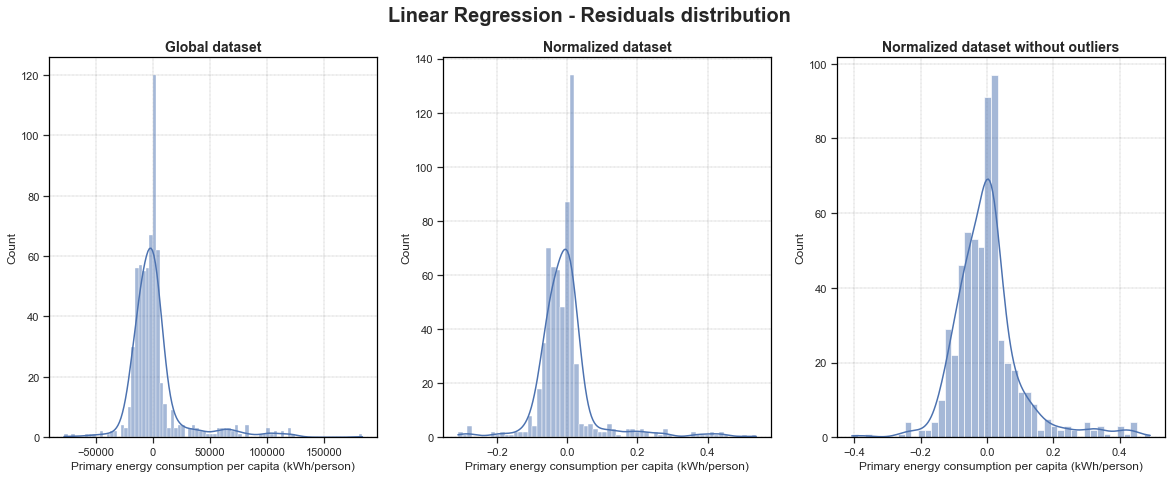

In [41]:
LR_model_pred = LR_model.predict(LR_X_pe_test)
LR_model_nor_pred = LR_model_nor.predict(LR_X_nor_pe_test)
LR_model_nor_wo_pred = LR_model_nor_wo.predict(LR_X_nor_pe_wo_test)

LR_residuals = LR_y_pe_test - LR_model_pred
LR_residuals_nor = LR_y_nor_pe_test - LR_model_nor_pred
LR_residuals_nor_wo = LR_y_nor_pe_wo_test - LR_model_nor_wo_pred

fig, ax = plt.subplots(1, 3, figsize=(20, 7))
sns.histplot(LR_residuals, ax=ax[0], kde=True).set_title(label='Global dataset', fontdict={'fontsize': 14, 'fontweight': 'bold'})
sns.histplot(LR_residuals_nor, ax=ax[1], kde=True).set_title(label='Normalized dataset', fontdict={'fontsize': 14, 'fontweight': 'bold'})
sns.histplot(LR_residuals_nor_wo, ax=ax[2], kde=True).set_title(label='Normalized dataset without outliers', fontdict={'fontsize': 14, 'fontweight': 'bold'})
fig.suptitle('Linear Regression - Residuals distribution', fontsize=20, fontweight='bold')
plt.savefig('../img/LR_residuals_distribution.png', dpi=200, bbox_inches='tight')


In [42]:
# Compute mean absolute error

from sklearn.metrics import mean_absolute_error

LR_model_mae = mean_absolute_error(LR_y_pe_test, LR_model_pred)
LR_model_nor_mae = mean_absolute_error(LR_y_nor_pe_test, LR_model_nor_pred)
LR_model_nor_wo_mae = mean_absolute_error(LR_y_nor_pe_wo_test, LR_model_nor_wo_pred)

MAE_results = pd.DataFrame({'Global dataset': [LR_model_mae], 'Normalized dataset': [LR_model_nor_mae], 'Normalized dataset without outliers': [LR_model_nor_wo_mae]})
MAE_results.index = ['Linear Regression - MAE']
MAE_results.round(3)

,Global dataset,Normalized dataset,Normalized dataset without outliers
Linear Regression - MAE,13802.029,0.051,0.068


## Elastic Net

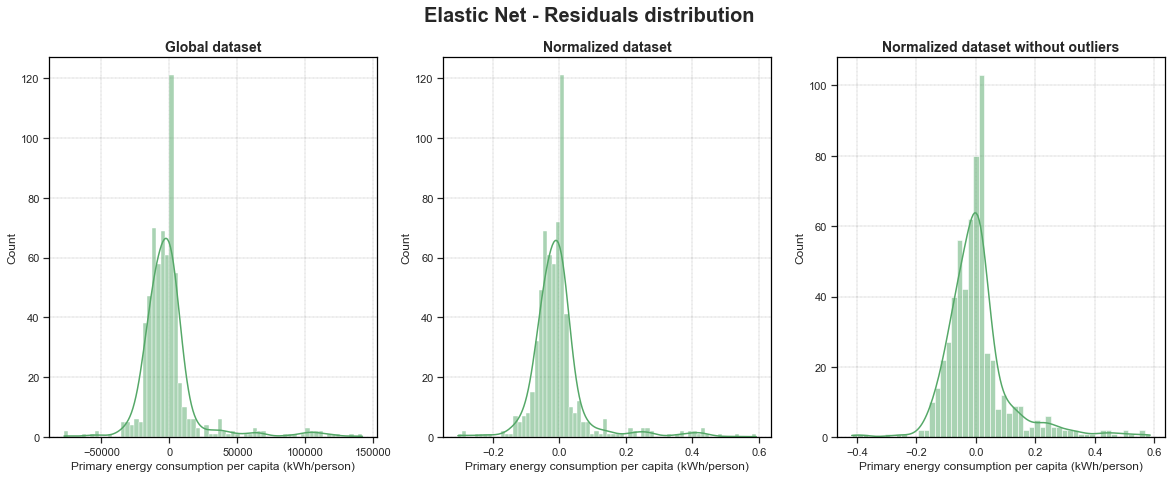

In [43]:
EN_model_pred = EN_model.predict(EN_X_pe_test)
EN_model_nor_pred = EN_model_nor.predict(EN_X_nor_pe_test)
EN_model_nor_wo_pred = EN_model_nor_wo.predict(EN_X_nor_pe_wo_test)

EN_residuals = EN_y_pe_test - EN_model_pred
EN_residuals_nor = EN_y_nor_pe_test - EN_model_nor_pred
EN_residuals_nor_wo = EN_y_nor_pe_wo_test - EN_model_nor_wo_pred

fig, ax = plt.subplots(1, 3, figsize=(20, 7))
sns.histplot(EN_residuals, ax=ax[0], color='g', kde=True).set_title(label='Global dataset', fontdict={'fontsize': 14, 'fontweight': 'bold'})
sns.histplot(EN_residuals_nor, ax=ax[1], color='g', kde=True).set_title(label='Normalized dataset', fontdict={'fontsize': 14, 'fontweight': 'bold'})
sns.histplot(EN_residuals_nor_wo, ax=ax[2], color='g', kde=True).set_title(label='Normalized dataset without outliers', fontdict={'fontsize': 14, 'fontweight': 'bold'})
fig.suptitle('Elastic Net - Residuals distribution', fontsize=20, fontweight='bold')
plt.savefig('../img/EN_residuals_distribution.png', dpi=200, bbox_inches='tight')

In [44]:
# Compute mean absolute error

EN_model_mae = mean_absolute_error(EN_y_pe_test, EN_model_pred)
EN_model_nor_mae = mean_absolute_error(EN_y_nor_pe_test, EN_model_nor_pred)
EN_model_nor_wo_mae = mean_absolute_error(EN_y_nor_pe_wo_test, EN_model_nor_wo_pred)

MAE_results.loc['Elastic Net - MAE'] = [EN_model_mae, EN_model_nor_mae, EN_model_nor_wo_mae]
MAE_results.round(3)

,Global dataset,Normalized dataset,Normalized dataset without outliers
Linear Regression - MAE,13802.029,0.051,0.068
Elastic Net - MAE,12987.561,0.052,0.071


## Linear SVR

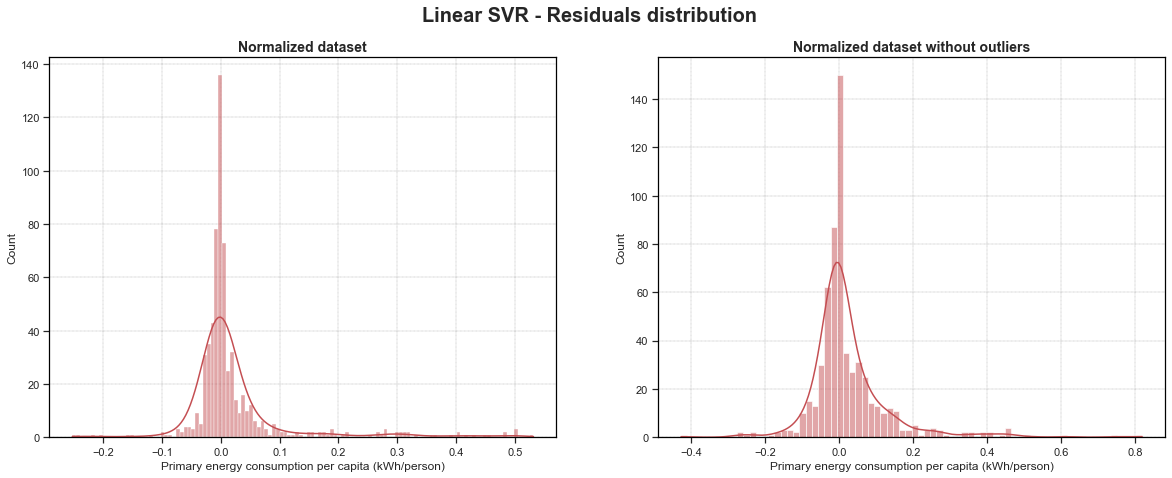

In [45]:
LSVR_model_nor_pred = LSVR_model_nor.predict(LSVR_X_nor_pe_test)
LSVR_model_nor_wo_pred = LSVR_model_nor_wo.predict(LSVR_X_nor_pe_wo_test)

LSVR_residuals_nor = LSVR_y_nor_pe_test - LSVR_model_nor_pred
LSVR_residuals_nor_wo = LSVR_y_nor_pe_wo_test - LSVR_model_nor_wo_pred

fig, ax = plt.subplots(1, 2, figsize=(20, 7))
sns.histplot(LSVR_residuals_nor, ax=ax[0], color='r', kde=True).set_title(label='Normalized dataset', fontdict={'fontsize': 14, 'fontweight': 'bold'})
sns.histplot(LSVR_residuals_nor_wo, ax=ax[1], color='r', kde=True).set_title(label='Normalized dataset without outliers', fontdict={'fontsize': 14, 'fontweight': 'bold'})
fig.suptitle('Linear SVR - Residuals distribution', fontsize=20, fontweight='bold')
plt.savefig('../img/LSVR_residuals_distribution.png', dpi=200, bbox_inches='tight')

In [46]:
# Compute mean absolute error

LSVR_model_nor_mae = mean_absolute_error(LSVR_y_nor_pe_test, LSVR_model_nor_pred)
LSVR_model_nor_wo_mae = mean_absolute_error(LSVR_y_nor_pe_wo_test, LSVR_model_nor_wo_pred)

MAE_results.loc['Linear SVR - MAE'] = [np.nan, LSVR_model_nor_mae, LSVR_model_nor_wo_mae]
MAE_results.round(3)

,Global dataset,Normalized dataset,Normalized dataset without outliers
Linear Regression - MAE,13802.029,0.051,0.068
Elastic Net - MAE,12987.561,0.052,0.071
Linear SVR - MAE,NaN,0.042,0.061


## Conclusion about model testing

### Residuals distribution plot

For all of my 8 models, we can see that our residuals are well randomly normally distributed. However for all of our models, we have a huge pike that betray a bit our random behaviour. Moreover, for Linear Regression and Elastic Net models, we have a huge amount of residuals that have a value a slightly higher than 0. For Linear SVR models, this huge pike is present right around 0, which coudl mean that those Linear SVR models are not biased (this is also the case for the other models but not has clear).

It is also clear that models that have been trained on normalized datasets without outliers give a better random behaviour of the residuals. Interesting to see that for the Linear SVR one, the plot is a bit left-skewed. This could mean that the model is a bit biased.

### Mean Absolute Error

According to the MAE, the best model is the Linear SVR trained on the normalized dataset. It is interesting to see that the Linear SVR model seems to have a better performance than the Linear Regression and Elastic Net models on the normalized dataset without outliers as its MAE is lower.

### Choice of the best model(s)

According to both the MAE and the residuals distribution plot, the best model (trade-off between accuracy and residuals distribution) model is the Linear SVR trained on the normalized dataset without outliers:

- A really nice randomly normally distributed around 0 residuals plot;
- A really low MAE value compared to other models;

Linear SVR algorithm is not the simplest one to understand and to use (I got troubles with the global dataset). However, it is quite close to the Linear Regression algorithm (hyperplane fitting instead of curve fitting).

Really honorable mention also to the Elastic Net model trained on the normalized dataset. It might be the more robust (ability  of a model to perform well on new and unseen data, not just on the data it was trained on) one: it has performed as well as the Linear Regression even though its $l1_{ratio}$ hyperparameter is set to 0.1, which means that it has a mix of L1 and L2 penalties.